Training MSE: 4.0725855909607835e-26
Training MAE: 1.4610800925749606e-13
Training R^2: 1.0
Testing MSE: 1080.4903444481251
Testing MAE: 24.57596401846543
Testing R^2: 0.905140978111407
[0.8170066  0.53797287 0.85730004 0.83680333 0.88696054]
Cross-Validated MSE:0.7872086764173946


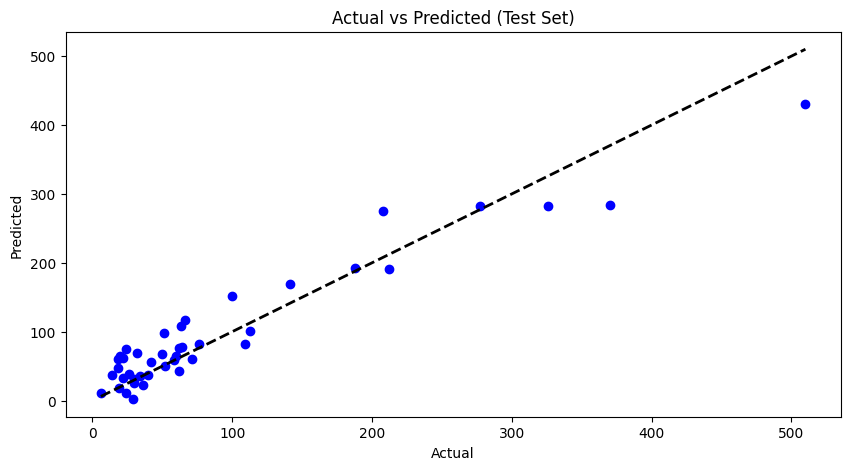

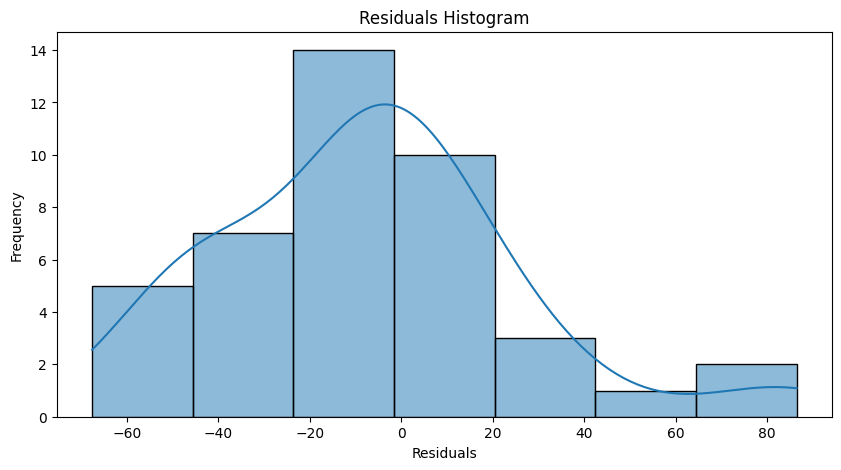

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import missingno as msn
from sklearn.feature_selection import SelectKBest, f_regression

# 데이터 불러오기
life = pd.read_csv("./machine.data_update.csv")

# 결측치 처리
life.dropna(inplace=True)

# 범주형 데이터 수치화
dum = pd.get_dummies(life.VendorName, prefix='c', dtype=float)
life = pd.concat([life.drop('VendorName', axis=1), dum], axis=1)

dum = pd.get_dummies(life.ModelName, prefix='c', dtype=float)
life = pd.concat([life.drop('ModelName', axis=1), dum], axis=1)

# 상관계수 계산
result = life.corr()['PRP']
result = np.abs(result)

# 피처 선택
features = result.index.tolist()
features.remove('PRP')

# 데이터 분할
X = life[features]
y = life['PRP']

# 선택된 피처로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# 데이터 전처리
scaler = StandardScaler()  # 표준화: 평균 0, 표준편차 1로 변환
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
model = LinearRegression()  # 선형 회귀 모델 생성
model.fit(X_train_scaled, y_train)  # 학습 데이터로 모델 훈련

# 모델 평가 - 학습 데이터
y_train_pred = model.predict(X_train_scaled)  # 학습 데이터에 대한 예측값
train_mse = mean_squared_error(y_train, y_train_pred)  # MSE 계산
train_mae = mean_absolute_error(y_train, y_train_pred)  # MAE 계산
train_r2 = r2_score(y_train, y_train_pred)  # R^2 계산

print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2: {train_r2}")

# 모델 평가 - 테스트 데이터
y_test_pred = model.predict(X_test_scaled)  # 테스트 데이터에 대한 예측값
test_mse = mean_squared_error(y_test, y_test_pred)  # MSE 계산
test_mae = mean_absolute_error(y_test, y_test_pred)  # MAE 계산
test_r2 = r2_score(y_test, y_test_pred)  # R^2 계산

print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2: {test_r2}")

# 교차 검증
cv_score = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-겹 교차 검증
print(cv_score)
cv_mse = cv_score.mean()
print(f'Cross-Validated MSE:{cv_mse}')

# 시각화 - 예측값 vs 실제값
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue')  # 실제값과 예측값의 산점도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.show()

# 잔차 히스토그램
residuals = y_test - y_test_pred  # 잔차 계산
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)  # 잔차의 히스토그램과 커널 밀도 추정
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()
